# Lending Club Case Study 

### Group Members:
 1. Himabindu Srirangam
 2. Oorugonda Anusha

### Assignment Brief:

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives:
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to **identify the risky loan applicants at the time of loan application** so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, **to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**  The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

## Exploratory Data Analysis

They have been provided with the **Private Data** of Lending Club.
<br>The complete **loan data** for all loans issued through the time period **2007 to 2011**.

We also have a data dictionary which describes the meaning of these variables.

### Assumption: 
<br>The loan request if graded by Lending Club and then listed for loan. Now it is up to the investor who decides which loan listing to invest in looking at the loan detail and borrowers information.
<br>Only those variables be chosen for analysis that will be available to the investor at the time of deciding whether to invest in a loan request or not.

## Exploratory Data Analysis

Lets start with importing all the libraries that are required for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 
from matplotlib import style
import seaborn as sns

Reading the loan data file.

In [2]:
loan=pd.read_csv('loan.csv',encoding='ISO-8859-1',low_memory=False)

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.shape

(39717, 111)

## DataCleaning

Finding out the missing values in each column which are greater than zero

In [6]:
missing=round(100*(loan.isnull().sum()/len(loan.index)),2)
missing.loc[missing>0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

There are columns which has 100% of missing values, they don't have any use in the analysis, so dropping the columns which are having 50% and above missing values

In [7]:
missing_columns=list(missing[missing >= 50].index)
len(missing_columns)

57

There are 57 columns having 50% and above missing values, as they add no value to the data its wiser to remove them.

In [8]:
loan=loan.drop(missing_columns,axis=1)

In [9]:
loan.shape

(39717, 54)

After removing we are left with 54 columns

In [10]:
missing=round(100*(loan.isnull().sum()/len(loan.index)),2)
missing.loc[missing!=0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

let's remove the desc column as same information is present in the columns <b>purpose</b> and <b>title</b>.

In [11]:
loan = loan.drop('desc',axis=1)

Now lets find the unique values and identify the categorical columns and values in it

In [12]:
print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


Its clear that emp_length,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens are <b>categorical</b> in nature lets find the unique values in them

Let's take a look at all the different values of these Categorical columns.

In [13]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [14]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [15]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [16]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [17]:
loan.tax_liens.unique()

array([ 0., nan])

The columns collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens has a value either 0 or nan ,hence they are not required for analysis 
Its better to drop them

In [18]:
loan = loan.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis=1)

In [19]:
loan.shape

(39717, 50)

Lets have a look at the public bankruptcies values and removing the null values in the column

In [20]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

As the number of null values are less so its better to remove those null values in a column

In [21]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [22]:
missing = round(100*(loan.isnull().sum()/len(loan.index)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In above missing values section, emp_title,emp_length has 6.19%,2.75% missing values as they have details about the borrower its better to retain the non-null values in the respective columns 

In [23]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [24]:
loan.shape

(36548, 50)

In [25]:
missing = round(100*(loan.isnull().sum()/len(loan.index)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Lets do the same as above for left over columns, title, revol_util and last_pymnt_d and remove null values.

In [26]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [27]:
loan.shape

(36433, 50)

Now, we have reduced the data set to have 36433 loan records and 50 attributes with no missing values. Let's write it into another file and use that file for further analysis.

In [28]:
missing =round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

#### Shortlisting and narrowing down the data 
Now from above we can see there are no more missing values. This ends the Data cleaning part.
Now We need to analyze further this dataframe and narrow down the columns for further analysis.

In [29]:
loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

A data dictionary file is also been provided along with the loan data. This file gives a brief describtion about all the columns of the loan transaction file.
<br> Let's use this file to get a better understanding of the 50 columns we are left with.
<br> This will help to further narrow down on the columns.

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

These columns are:
1. __id__
:<br>is a random number given to the loan, does not contribute to analysis
2. __member_id__
:<br>is a random number given to the member, does not contribute to analysis
3. __pymnt_plan__
:<br> value for entire dataset is 'n', therefore can be removed.
4. __url__
:<br>is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
5. __zip_code__
:<br>first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
6. __initial_list_status__
:<br> value for entire dataset is 'f' out of the possible values, therefore can be removed.
7. __policy_code__
:<br> value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
8. __application_type__
:<br>value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
9. __acc_now_delinq__
:<br>value for entire dataset is '0', therefore can be removed.
10. __delinq_amnt__
:<br>value for entire dataset is '0', therefore can be removed.
11. __funded_amnt__
:<br> value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
12. __funded_amnt_inv__
:<br> value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.

Dropping the above columns from the loan dataframe.

In [30]:
columns_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt']
loan= loan.drop(columns_dropped,axis=1)

In [31]:
loan.shape

(36433, 38)

Columns for analysis reduced to 38 columns.

Now let us correct the precision values for the below columns.
1. total_pymnt
2. total_rec_late_fee
3. collection_recovery_fee

In [32]:
loan.total_pymnt.value_counts().tail()

5517.160000     1
12878.238670    1
4348.288927     1
8954.809409     1
4608.000000     1
Name: total_pymnt, dtype: int64

In [33]:
loan.total_rec_late_fee.value_counts().tail()

29.914662    1
23.820000    1
15.610000    1
59.781000    1
14.944409    1
Name: total_rec_late_fee, dtype: int64

In [34]:
loan.collection_recovery_fee.value_counts().tail()

18.3264     1
198.4078    1
9.6738      1
33.2896     1
93.3678     1
Name: collection_recovery_fee, dtype: int64

In [35]:
loan.total_pymnt_inv.value_counts().tail()

25433.98    1
17678.14    1
13785.89    1
12251.54    1
4608.00     1
Name: total_pymnt_inv, dtype: int64

In [36]:
loan.installment.value_counts().tail()

336.53    1
863.42    1
615.09    1
375.66    1
595.76    1
Name: installment, dtype: int64

In [37]:
loan.total_pymnt= round(loan.total_pymnt,2)
loan.total_rec_late_fee= round(loan.total_rec_late_fee,2)
loan.collection_recovery_fee= round(loan.collection_recovery_fee,2)

Lets go with, DateTime columns as they are recognised as string, so converting to datetime is more important
1. issue_d
2. earliest_cr_line
3. last_pymnt_d
4. last_credit_pull_d

In [38]:
datetime_cols=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[datetime_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


extracting only month and year format as we are going to analyse in month wise and year wise

In [39]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [40]:
loan[datetime_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


If any duplicate rows are found need to drop them

In [41]:
loan.shape

(36433, 38)

In [42]:
loan=loan.drop_duplicates()

In [43]:
loan.shape

(36433, 38)

The columns int_rate,revol_util have'%' in it, and the data type is object, so, we need to typecast it to float to prevent type errors

In [44]:
loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [45]:
loan.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [46]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [47]:
loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


Let us now look at the __emp_length__ column.

In [48]:
loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

According to the data_dictionary file description for this field,<br> emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
<br> Let's convert the column to have values between 0 and 10.

In [49]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [50]:
loan = loan.replace({"emp_length": emp_length_dict })

In [51]:
loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

term (term period of the loan) values should be in months and column should contain 36 or 60.<br> Remove the string 'months'

In [52]:
loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [53]:
loan['term'] =loan.term.apply(lambda x: x.split()[0])

In [54]:
loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

**earliest_cr_line:** The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year
Lets split the available date into month and year column.

In [55]:
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year']=loan['earliest_cr_line'].dt.year

In [56]:
len(loan[loan['earliest_cr_line_year'] > 2011])

50

We see that there are 50 records with the earliest credit line date greater than the max range in our dataset is 2011 this seems to be like y2k error, the year in 2 digits are interpreted as 21st century lets treat them

In [57]:
loan[loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

In [58]:
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100

In [59]:
loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

issue_d, the month which the loan was funded .Lets split the available date into month and year column.

In [60]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

In [61]:
loan.shape

(36433, 42)

**Now our data is perfectly fit for Analysis with 42 columns and 36433 records**
## Analysis

In [62]:
loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

As we need to understand differences between Fully Paid and Charged off. let us not consider Current.

In [63]:
loan = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]
loan.shape

(35367, 42)

<h2>Analysis:  Univariate Analysis and Segmented Univariaye Analysis</h2>

Lets look at some important columns 

<h2>Column: loan_status</h2> this is the key column

In [64]:
#In order to show labels for bar plots, 
#copied from stackoverflow https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart/48372659#48372659
def add_value_labels(ax, d=None):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [65]:
#A custom define method which plots against loan_status default as charged off
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.grid(zorder=0)
    ax.set_axisbelow(True)
    ax.set_ylabel('% of loans ' + loanstatus)
    #add_value_labels(ax)
    add_value_labels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [66]:
#A custom method used for plotting sub plots, with % of categorical values and % of charged off loans
def plotPercentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('deep', 16))
    ax.grid(zorder=0)
    ax.set_axisbelow(True)
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    add_value_labels(ax)
    plt.subplot(1, 2, 2)
    values = (loan.loc[loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('muted', 16))
    ax.grid(zorder=0)
    ax.set_axisbelow(True)
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    add_value_labels(ax)

In [67]:
#A custom defined method which will plot distribution of target column as parameter, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    ax.grid(zorder=0)
    ax.set_axisbelow(True)
    plt.subplot(1, 2, 2)
    ax = sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    ax.grid(zorder=0)
    ax.set_axisbelow(True)
    plt.show()

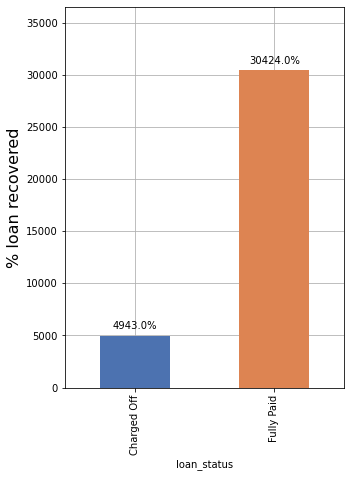

In [68]:
plt.figure(figsize=(5,7))
ax = loan.groupby('loan_status').loan_amnt.count().plot.bar(color=sns.color_palette('deep', 7))
ax.set_ylabel('% loan recovered', fontsize=16)
ax.grid(zorder=0)
ax.set_axisbelow(True)
add_value_labels(ax)
plt.show()

Lets calculate the business risk here, any variable that increases % of default to higher that 16.5% should be considered as business risk. Let us see in our loan data about this business risk for loans status

In [69]:
print("%.2f" % (loan.loc[loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan)))

13.98


From the above percentage aprox. 14% loans are defaulted.<br>Now let us see how much does Lending club recover.  

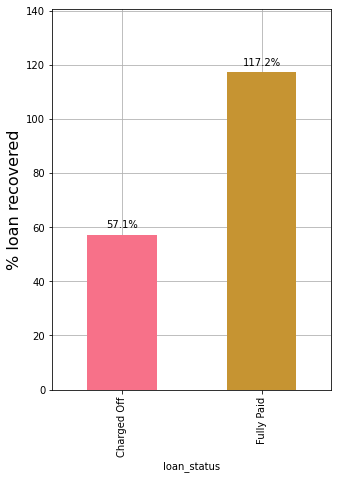

In [70]:
plt.figure(figsize=(5,7))
ax = (loan.groupby('loan_status').total_pymnt.sum() * 100 / loan.groupby('loan_status').loan_amnt.sum()).plot.bar(color=sns.color_palette('husl', 7))
ax.grid(zorder=0)
ax.set_axisbelow(True)
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)

add_value_labels(ax)

From above bar plot we can say that Lending Club only recovers 57% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 17% profit.

In [71]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


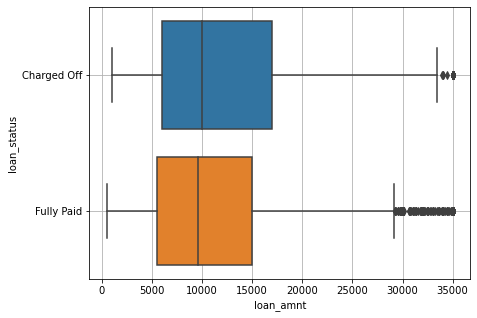

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
ax = sns.boxplot(x=loan['loan_amnt'], y=loan['loan_status'], data=loan)
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.show()

We observe that most of the loans granted are below 15000 in the 75% percentile, loan amount distribution is slightly skewed with mean greater than the median, and also if you see  <br><br> 
It is also observed that funding amounts increase around each 5000 boundary. The Charged off loans are moved towards higher average loan amount.

Lets create a derived categorical value 

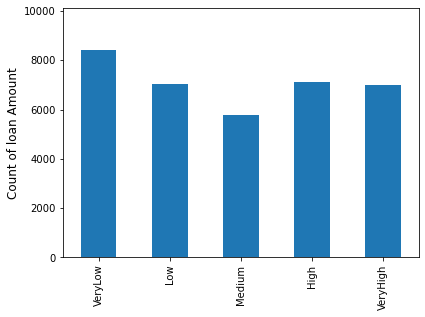

In [73]:
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])
loan_amt_series=pd.to_numeric(loan['loan_amnt'])
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.ylabel('Count of loan Amount',fontsize=12)
plt.margins(0.2, 0.2)
plt.tight_layout()

pd.qcut(loan_amt_series,q=5,labels=['VeryLow','Low','Medium','High','VeryHigh'],duplicates='drop').value_counts(sort=False).plot.bar()


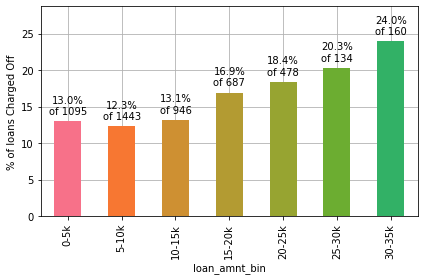

In [74]:
plotLoanStatus(loan, 'loan_amnt_bin')

We observe from above plot  that the % of charged off loans increases as we go up the loan amount buckets and also most loan amount are below 20000 amount. If the loan amount is higher there can be a higher risk of default.

Let us plot plots for some other categorical variables of interest in the dataset.

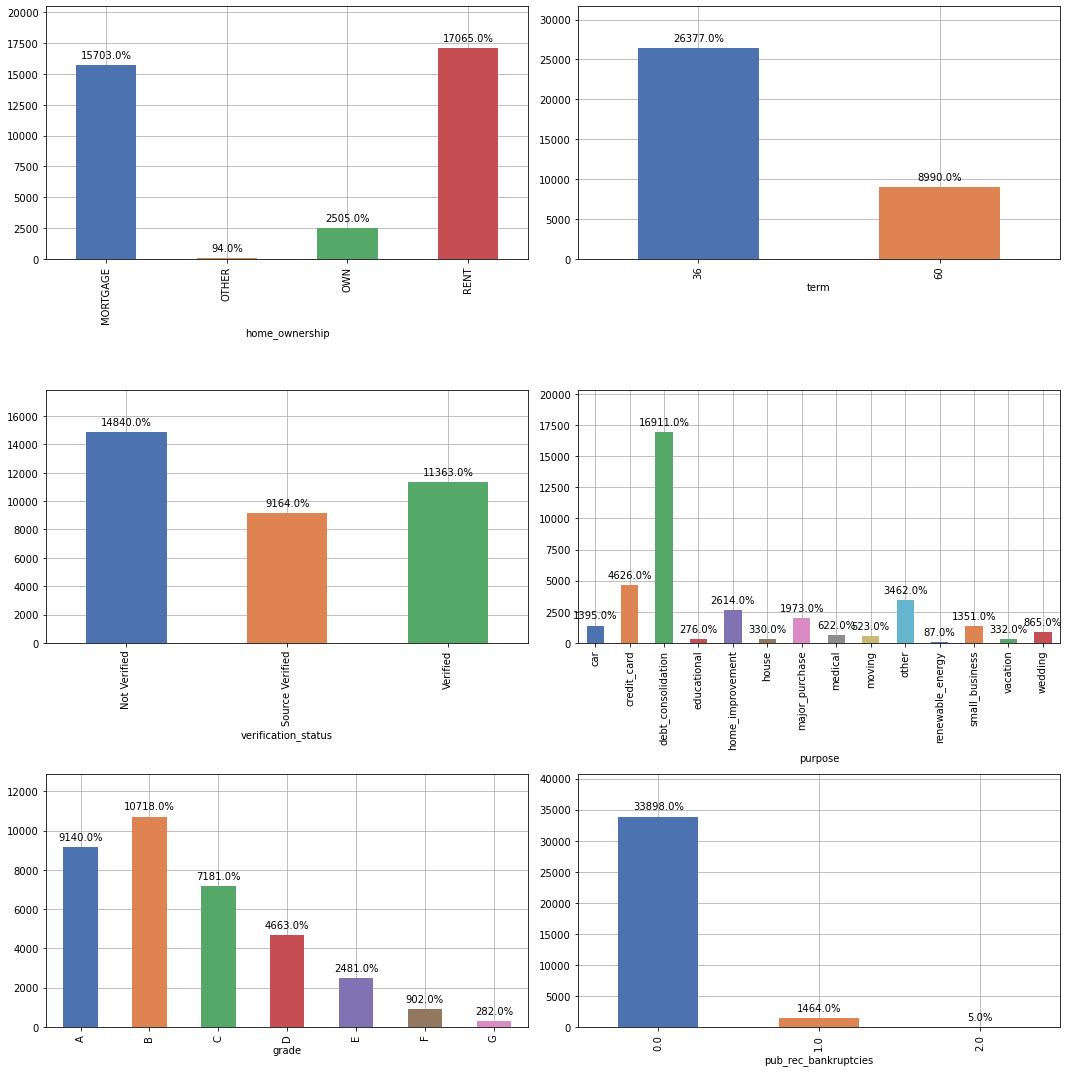

In [75]:
arr = ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies']
rows = int(len(arr)/2)
plt.figure(figsize=(15,15))
for idx, val in enumerate(arr, start=1):
    plt.subplot(rows, 2, idx)
    ax = loan.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('deep', 16))
    ax.grid(zorder=0)
    ax.set_axisbelow(True)
    add_value_labels(ax)

plt.tight_layout()

**Observations**
* Most of the loans from the second plot on terms is of 36 months
* The largest purpose of seeking a loan is by debt_consolidation
* Most approved loans are high grade.
* Very few loans are extended to people with prior record of bankruptcy.
    

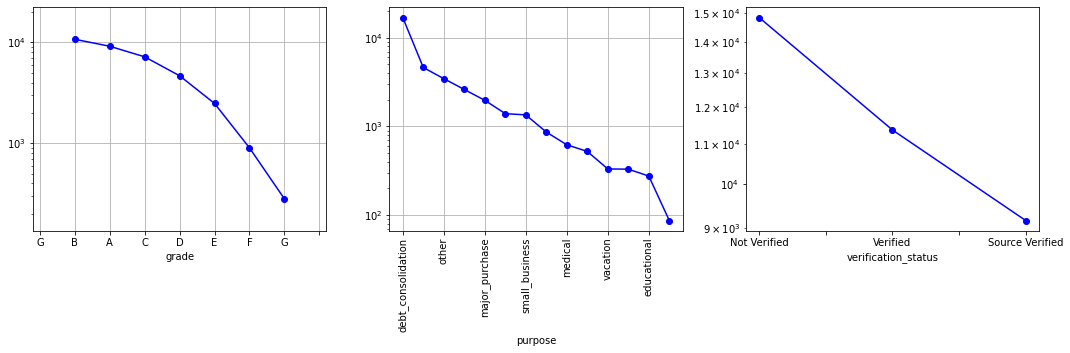

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
ax = loan.groupby('grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
ax.grid(zorder=0)
ax.set_axisbelow(True)
add_value_labels(ax)
plt.subplot(1, 3, 2)
ax = loan.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.xticks(rotation=90)
plt.subplot(1, 3, 3)
ax = loan.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.tight_layout()

**Observation**<br>
Purpose and vertification_status follow the power law

<h2>Colum: term</h2>
The number of payments on the loan, which is either 36 or 60
Let us use this column for ploting some graphs and observations

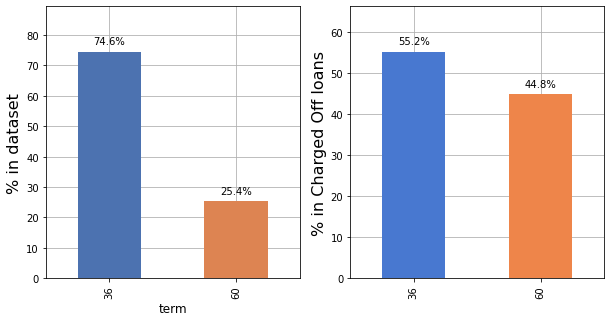

In [77]:
plt.figure(figsize=(10,5))
plotPercentages(loan, 'term')

**Observations**
* Arroud 25% of the loans are given for 3 years, whereas 75% of the loans are given for 5 years.
* For the charged off loans, % of term 60 months rises to 45%, the higher term loans have a higher chance of default.

<h2>Column: purpose</h2>
This is category provided by the borrower for the loan request.

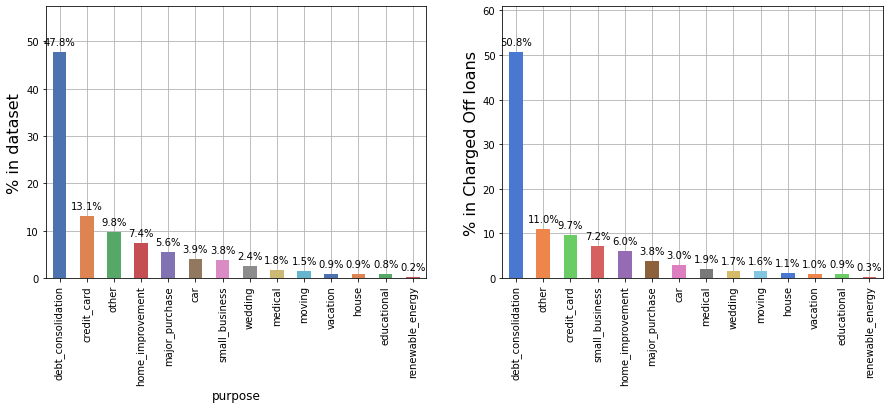

In [78]:
plt.figure(figsize=(15,5))
plotPercentages(loan, 'purpose')

**Observation**
* We can see that the small_business % doubles for charged off loans.  

Let us see how categories of the purpose variable behave with the loan status

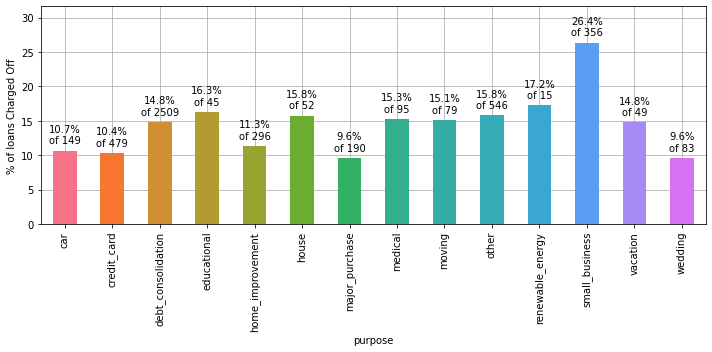

In [79]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loan, 'purpose')

**Observations**
* The small_business are charged off with 26% of loans. they are the purpose with most risk.
* Approx 49% of the loans are issued for the purpose debt_consolidation.
* The purpose renewable_energy are charged off with 17% of the loans, which is too less.

<h2>Column: pub_rec_bankruptcy</h2>
Number of public records bankruptcies

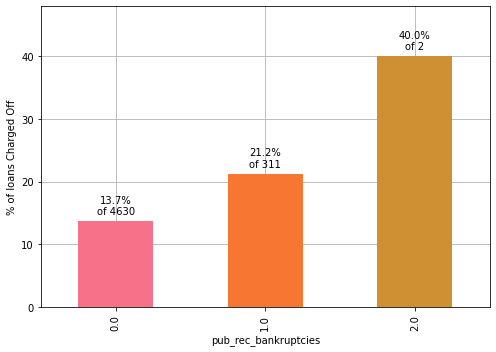

In [80]:
plt.figure(figsize=(7,5))
plotLoanStatus(loan, 'pub_rec_bankruptcies')

**Observations**
* The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.

<h2>Column: int_rate</h2>
Interest rate on the loan

In [81]:
loan.int_rate.describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<Figure size 1080x360 with 0 Axes>

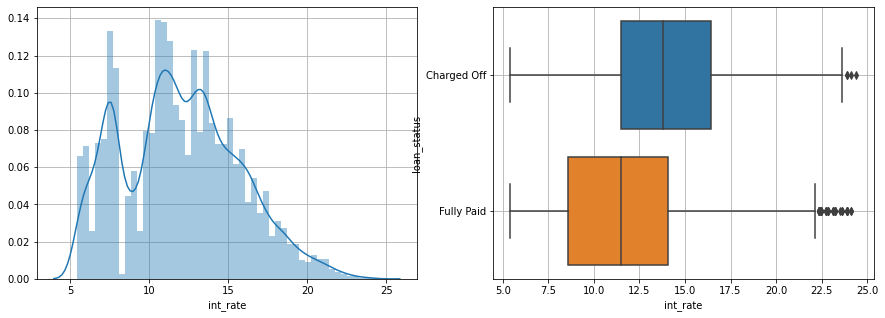

In [82]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'int_rate')

In [83]:
loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


**Observation:**
-  Overall, the interest rate varies from min-5.42% to max-24.4% with average intrest rate of 11.8%.
-  If we observe in the above plots, the interest rate for Charged Off loans appear to be higher than for Fully paid. As, the risk increases the rate of interest imposed on the loan also increases.


Lets analyze this more

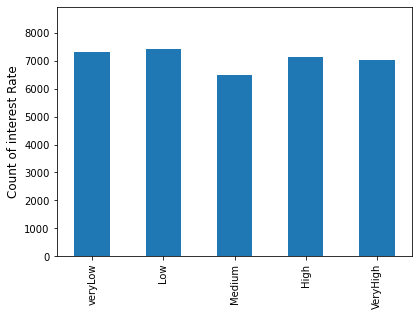

In [84]:
loan['interest_rate_buckets'] = round(loan['int_rate'])
intrest_rate_series=pd.to_numeric(loan['int_rate'])
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.ylabel('Count of interest Rate',fontsize=12)
plt.margins(0.2, 0.2)
plt.tight_layout()

pd.qcut(intrest_rate_series,q=5,labels=['veryLow','Low','Medium','High','VeryHigh'],duplicates='drop').value_counts(sort=False).plot.bar()


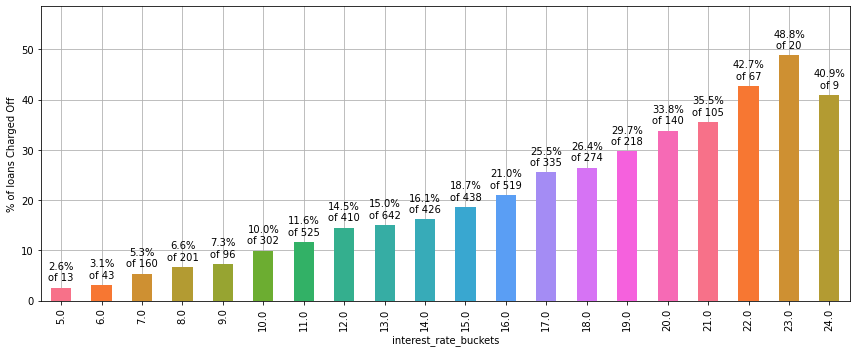

In [85]:
plt.figure(figsize=(12,5))
plotLoanStatus(loan, 'interest_rate_buckets')

<h2>Column: installment</h2>
The monthly payment variable.

In [86]:
loan.installment.describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

<Figure size 1080x360 with 0 Axes>

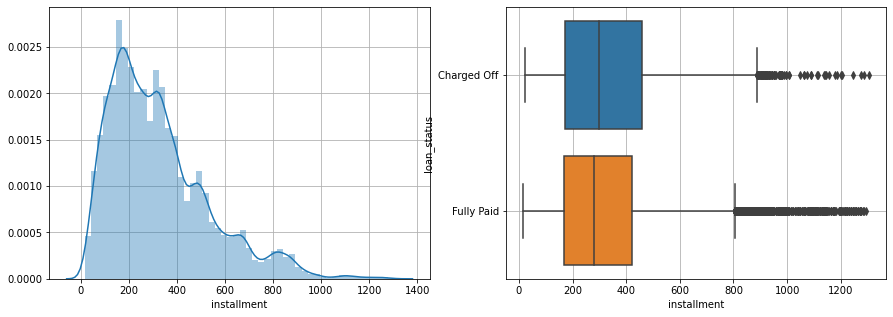

In [87]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'installment')

In [88]:
loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


**Observation:**
-  loans Charged Off have high installment on average

<h2>Column: grade and sub_grade</h2>
The monthly payment variable.

In [89]:
loan.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

In [90]:
loan.sub_grade.value_counts(normalize=True).head()

A4    0.075268
B3    0.073204
A5    0.070320
B5    0.069104
B4    0.063534
Name: sub_grade, dtype: float64

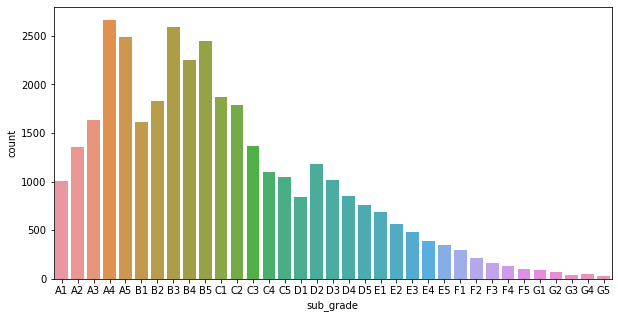

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(loan['sub_grade'], order=sorted(loan.sub_grade.unique()))
plt.show()

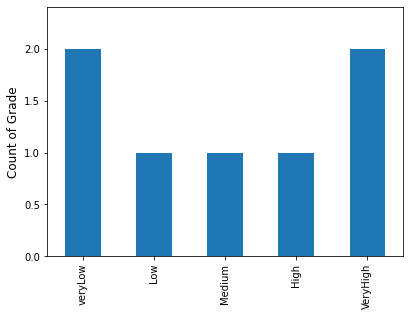

In [92]:
grade_series=pd.to_numeric(loan.grade.value_counts())
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.ylabel('Count of Grade',fontsize=12)
plt.margins(0.2, 0.2)
plt.tight_layout()

pd.qcut(grade_series,q=5,labels=['veryLow','Low','Medium','High','VeryHigh'],duplicates='drop').value_counts(sort=False).plot.bar()


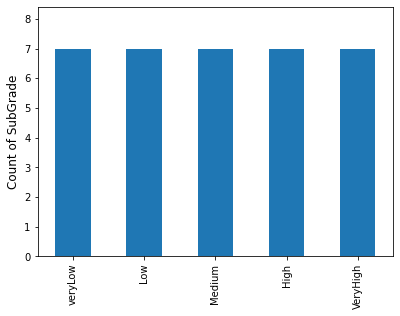

In [93]:
sub_grade_series=pd.to_numeric(loan.sub_grade.value_counts())
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.ylabel('Count of SubGrade',fontsize=12)
plt.margins(0.2, 0.2)
plt.tight_layout()

pd.qcut(sub_grade_series,q=5,labels=['veryLow','Low','Medium','High','VeryHigh'],duplicates='drop').value_counts(sort=False).plot.bar()


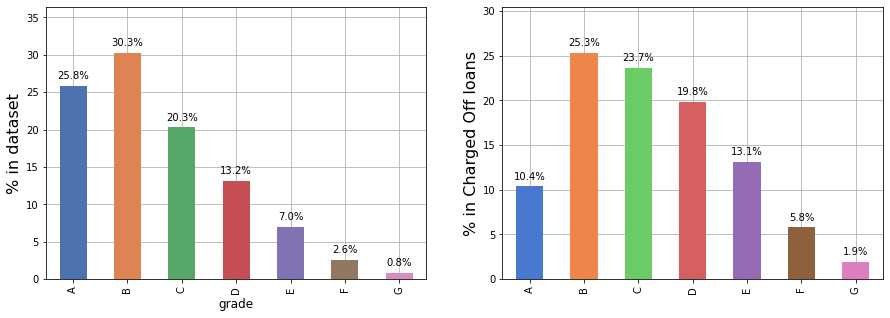

In [94]:
plt.figure(figsize=(15,5))
plotPercentages(loan, 'grade', True)

**Observations**
* Grades A and B are safe for loans.
* Grades D, E, F, G loans are less safe. 

Lets plot grades with loan status

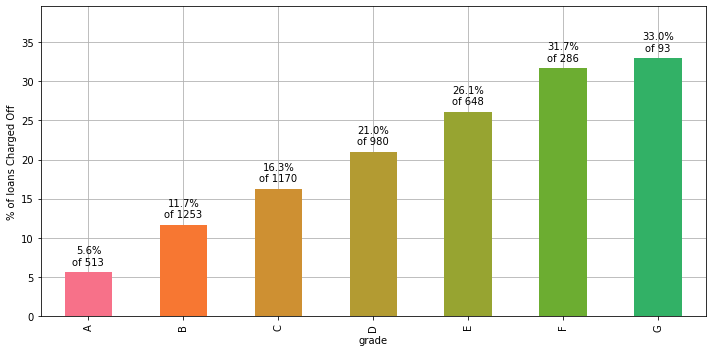

In [95]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan, 'grade')

**Observations**
* Grades F and G have nearly 30% of loans which are as default.
* Grade E on wards are risky,and less. 

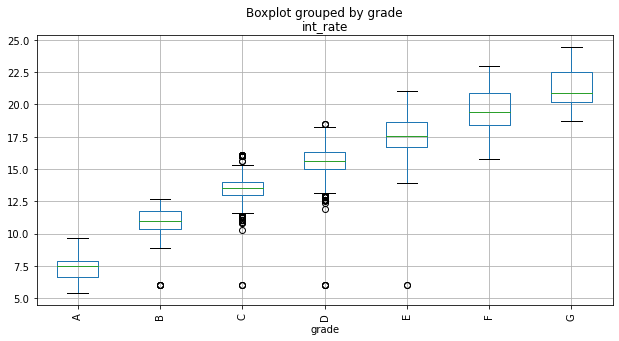

In [96]:
fig, ax = plt.subplots(figsize=(10,5))
loan.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

**Observations**
 From above lending club is charging high interest rates for lower grade loans

<h2>Column: emp_title</h2>
The job title supplied by the Borrower when applying for the loan.*


In [97]:
emp_title = loan.emp_title.value_counts(normalize=False).head(15)
emp_title

US Army                    128
Bank of America            106
IBM                         65
AT&T                        57
Kaiser Permanente           55
Wells Fargo                 52
USAF                        51
UPS                         51
US Air Force                50
Walmart                     44
Lockheed Martin             42
United States Air Force     40
U.S. Army                   40
Verizon Wireless            40
USPS                        39
Name: emp_title, dtype: int64

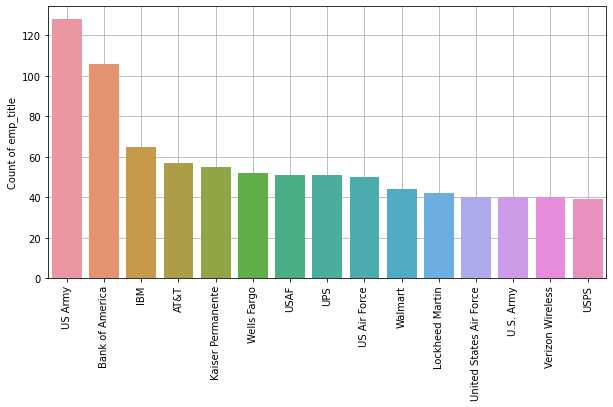

In [98]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=emp_title.index, y=emp_title.values)
ax.grid(zorder=0)
ax.set_axisbelow(True)
ax.set_ylabel('Count of emp_title')
plt.xticks(rotation=90)
#add_value_labels(ax)
plt.show()

**Observations**
* We can see the top 10 max of the loan takers from the above plot.
* The numbers per employer are quite low, and this variable is unlikely to have an impact on default rates.

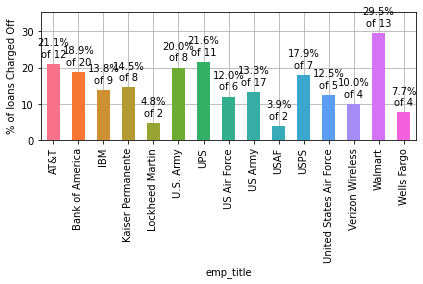

In [99]:
plotLoanStatus(loan[loan['emp_title'].isin(emp_title.index.values)], 'emp_title')

<h2>Column:emp_length</h2>
Employement in years, values are between 0 and 10 years
Let us do count plot on emp_length

In [100]:
loan.emp_length.value_counts(normalize=True)

10    0.226991
2     0.115447
0     0.112478
3     0.108378
4     0.090649
5     0.086041
1     0.083666
6     0.058303
7     0.046314
8     0.038482
9     0.033251
Name: emp_length, dtype: float64

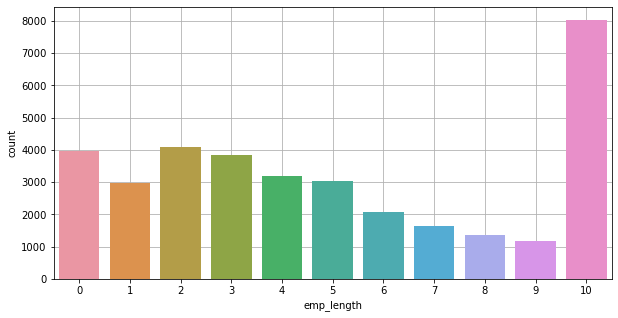

In [101]:
plt.figure(figsize=(10,5))
ax = sns.countplot(loan['emp_length'], order=sorted(loan.emp_length.unique()))
ax.grid(zorder=0)
ax.set_axisbelow(True)
#add_value_labels(ax)
plt.show()

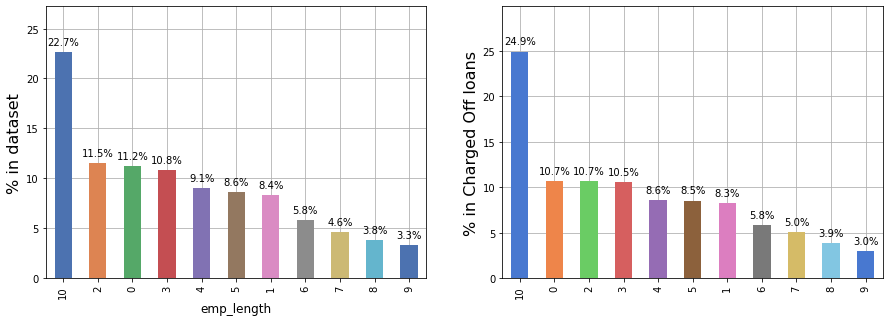

In [102]:
plt.figure(figsize=(15, 5))
plotPercentages(loan, 'emp_length')

**Observations**
* 22.7% of the loan taker have an employment of more than 10 years 
* There is no impact on the charged off loans in this case.

<h2>Column: home_ownership</h2>
The home ownership status provided by the borrower during registration. values are: RENT, OWN, MORTGAGE, OTHER.

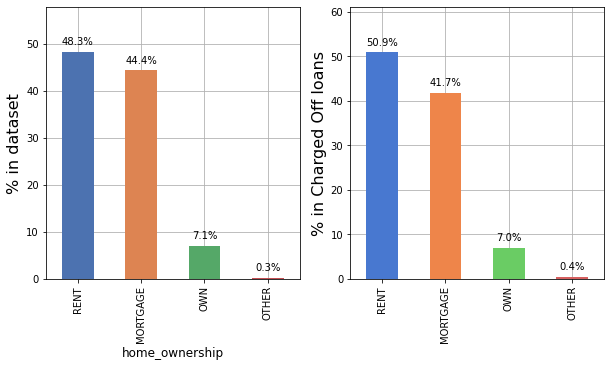

In [103]:
plt.figure(figsize=(10,5))
plotPercentages(loan, 'home_ownership')

**Observations**
* There is no impact of home_ownership on charged of loans

<h2>Column: annual_inc</h2>
The self-reported annual income provided by the borrower during registration.

In [104]:
loan.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

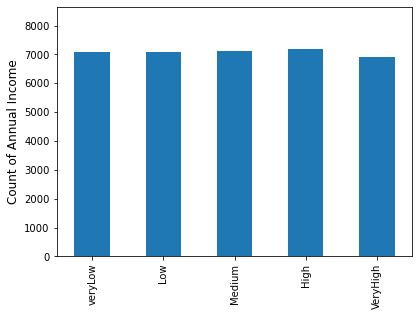

In [105]:
annual_inc_series=pd.to_numeric(loan.annual_inc)
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.ylabel('Count of Annual Income',fontsize=12)
plt.margins(0.2, 0.2)
plt.tight_layout()

pd.qcut(annual_inc_series,q=5,labels=['veryLow','Low','Medium','High','VeryHigh'],duplicates='drop').value_counts(sort=False).plot.bar()


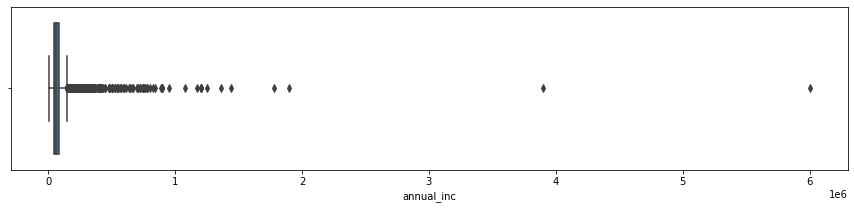

In [106]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=loan['annual_inc'], data=loan)

**Observations**
* The annual income reported by the borrowers range from min 4000 to max 6,000,000. There are people with large income who are applying for less loan amount. 
* Median annual income is around 60,000.
* Most people have annual income less than 115000

Clearly we can see the outliers in the annual income, lets try to remove them. Let us keep only +3 and -3  standard deviations in the column Data. 

In [107]:
df = loan[np.abs(loan.annual_inc-loan.annual_inc.mean()) <= (3*loan.annual_inc.std())]

In [108]:
df.annual_inc.describe()

count     35122.000000
mean      66255.515193
std       35749.840874
min        4000.000000
25%       41004.000000
50%       59449.000000
75%       81969.000000
max      260000.000000
Name: annual_inc, dtype: float64

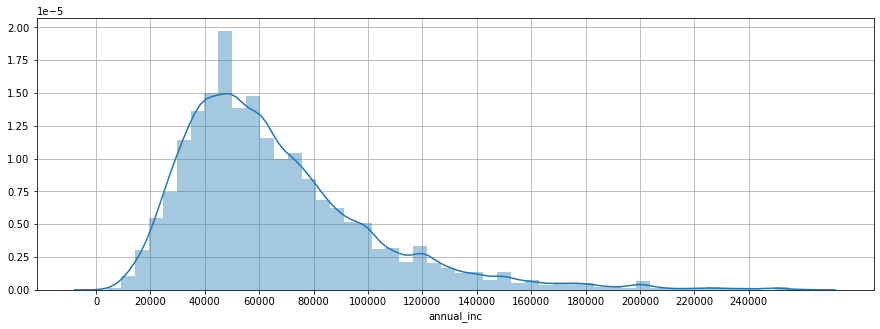

In [109]:
plt.figure(figsize=(15, 5))
ax = sns.distplot(df['annual_inc'], hist_kws={'log':False})
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

**Observation**
* 10000 seems to be a good bin size to further analyze income as categories

<b>Create Derived categorical variable</b>

In [110]:
loan['income_bin'] = loan['annual_inc']/20000
loan['income_bin'] = loan['income_bin'].astype(int)


[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

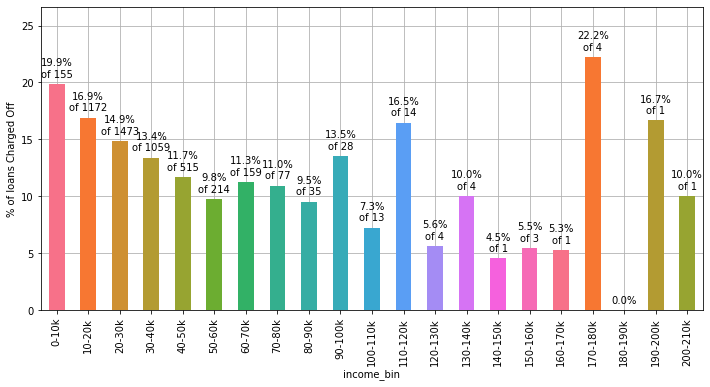

In [111]:
plt.figure(figsize=(10,5))
ax = plotLoanStatus(loan.loc[loan['income_bin']<21], 'income_bin')
txt_values = [(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()]
ax.set_xticklabels(txt_values)

**Observations**
* Loan defaults are higher for lower income, and progessively reduce as income goes up.


<h2>Column: verification_status</h2>
Indicates if income was verified by LC, not verified, or if the income source was verified

In [112]:
loan.verification_status.value_counts()

Not Verified       14840
Verified           11363
Source Verified     9164
Name: verification_status, dtype: int64

Loans 'Verified' and 'Source Verified' status both imply that LC has cross checked the income value specified by the borrower and thus both statuses can be treated as one.

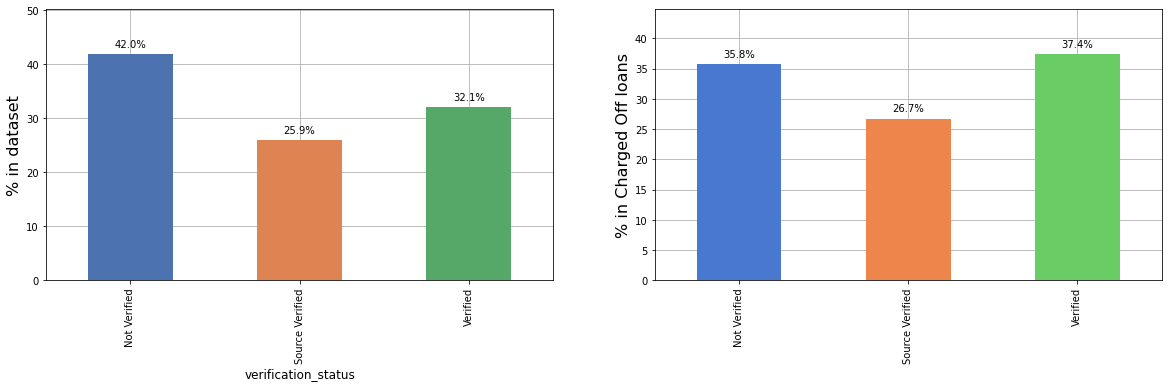

In [113]:
plt.figure(figsize=(20,5))
plotPercentages(loan, 'verification_status', True)

**Observation:**
-  Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.
-  <mark>Verified loans show more charged Off percentage as compared to Not verified loans.</mark> This is unexpected and will be investigated later in bivariate analysis 

<h2>Column: issue_d</h2>
Month in which loan was funded.

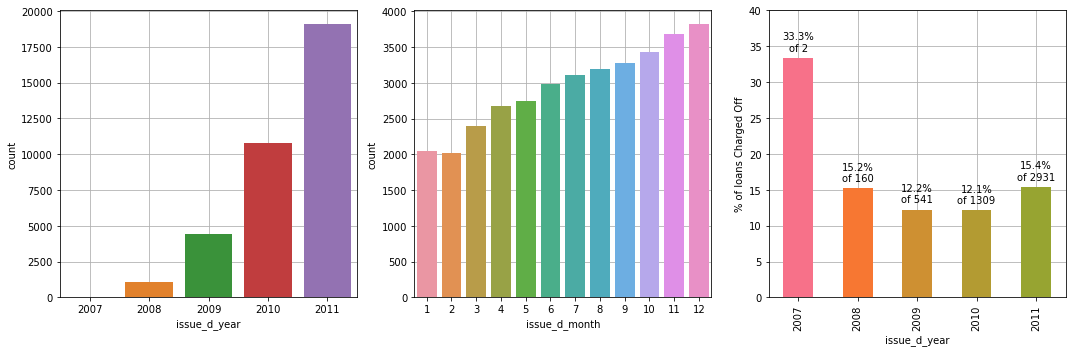

In [114]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
ax = sns.countplot(loan['issue_d_year'], order=sorted(loan.issue_d_year.unique()))
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.subplot(1, 3, 2)
ax = sns.countplot(loan['issue_d_month'], order=sorted(loan.issue_d_month.unique()))
ax.grid(zorder=0)
ax.set_axisbelow(True)
#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plotLoanStatus(loan, 'issue_d_year')
plt.show()

**Observation:**
-  Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
-  Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued. Is the company trying to meet targets in the later months of the year? 
-  Year of loan has no significant effect on likelihood of default. 

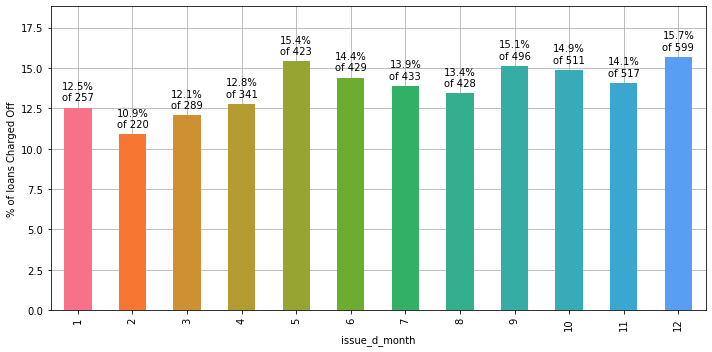

In [115]:
plt.figure(figsize=(10, 5))
plotLoanStatus(loan, 'issue_d_month')

**Observation:**
-  Month of loan is spread out and has no significant effect on likelihood of default. 

<h2>Column: title</h2>
The loan title provided by the borrower

In [116]:
loan.title.describe()

count                  35367
unique                 17662
top       Debt Consolidation
freq                    1975
Name: title, dtype: object

In [117]:
loan.title.value_counts().head(10)

Debt Consolidation           1975
Debt Consolidation Loan      1541
Personal Loan                 589
Consolidation                 462
debt consolidation            440
Credit Card Consolidation     325
Home Improvement              324
Debt consolidation            303
Personal                      281
Credit Card Loan              280
Name: title, dtype: int64

**Observation:**
- title column has 17662 unique values describing the loan by the borrower. This information is already captured with purpose column under 14 catergories of purpose. We can choose to drop this column.

In [118]:
loan = loan.drop('title',axis =1 )

<h2>Column: addr_state</h2>
The state provided by the borrower in the loan application

In [119]:
loan.addr_state.value_counts(normalize=True).head(10)

CA    0.180847
NY    0.095739
FL    0.071677
TX    0.069358
NJ    0.047134
IL    0.039048
PA    0.038822
VA    0.035626
GA    0.035429
MA    0.033393
Name: addr_state, dtype: float64

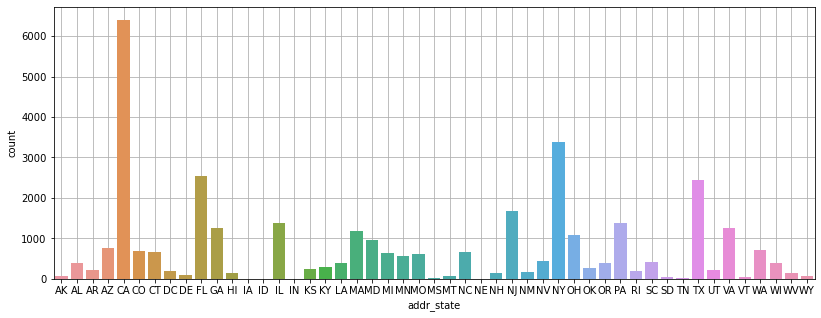

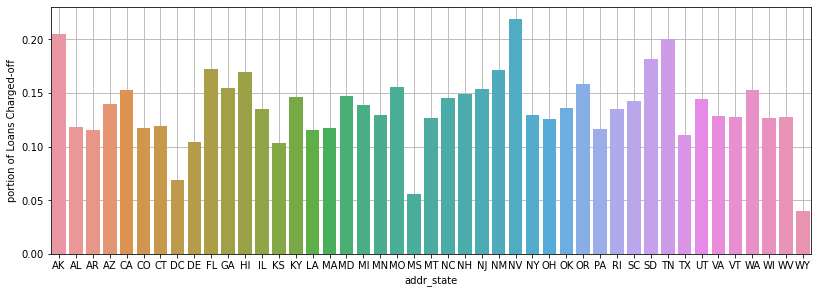

In [120]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
ax = sns.countplot(loan['addr_state'], order=sorted(loan.addr_state.unique()))
ax.grid(zorder=0)
ax.set_axisbelow(True)

charge_off_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.grid(zorder=0)
a.set_axisbelow(True)
a.set_ylabel('portion of Loans Charged-off')
plt.show()

**Observation:**
- Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
- States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default. 


<h2>Column: dti</h2>
 A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [121]:
loan.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

The dti index varies from min 0 to max of 30. The median dti is of 13.5

<Figure size 720x360 with 0 Axes>

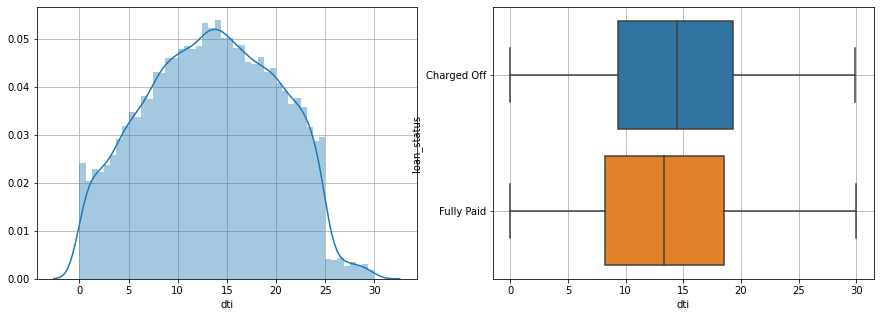

In [122]:
plt.figure(figsize=(10,5))
plot_distribution(loan, 'dti')

In [123]:
# Create derived variable 
loan['dti_bin'] = pd.cut(loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


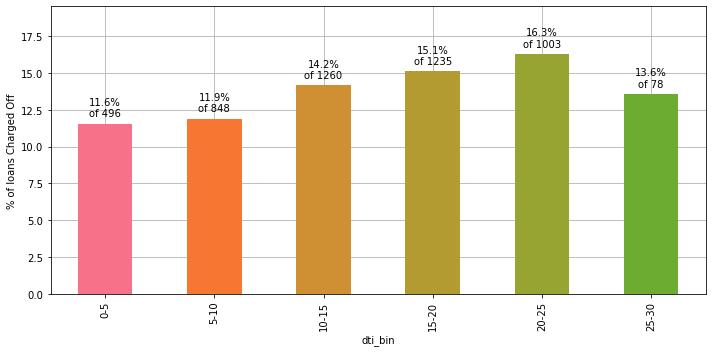

In [124]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan, 'dti_bin')

**Observation:**
- When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off
- Higher the dti higher the chances of loan being Charged Off

<h2>Column: delinq_2yrs</h2>
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [125]:
loan.delinq_2yrs.value_counts(normalize=True)

0     0.891594
1     0.083100
2     0.017361
3     0.005344
4     0.001499
5     0.000594
6     0.000283
7     0.000113
8     0.000057
11    0.000028
9     0.000028
Name: delinq_2yrs, dtype: float64

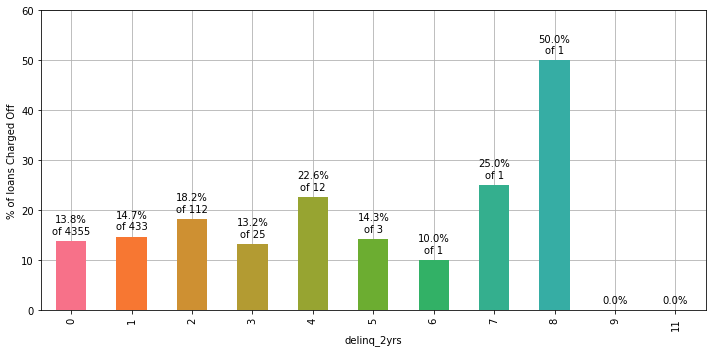

In [126]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan, 'delinq_2yrs')

**Observation:**
-  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
- There are higher chances of default if this variable is greater than 1. 

<h2>Column: earliest_cr_line</h2>
The month the borrower's earliest reported credit line was opened.

In [127]:
loan.earliest_cr_line_year.value_counts(normalize=True).head()

2000    0.083326
1999    0.076201
1998    0.072638
2001    0.065259
1997    0.062403
Name: earliest_cr_line_year, dtype: float64

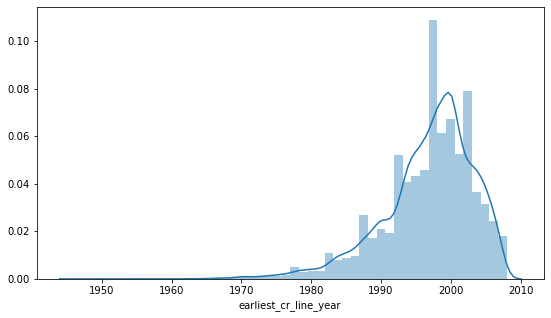

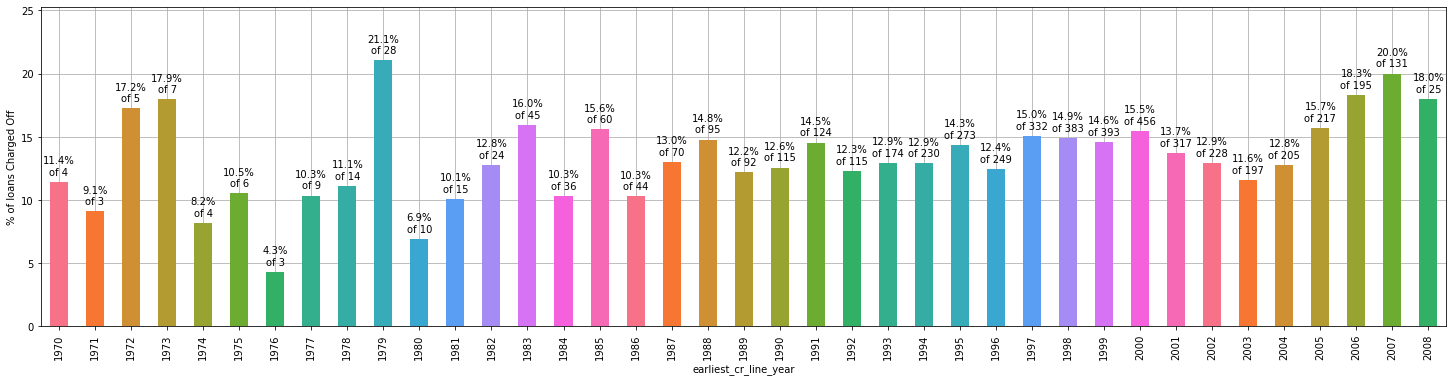

In [128]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.distplot(loan['earliest_cr_line_year'])

plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plotLoanStatus(loan.loc[loan['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()

**Observation:**
-  8% of the loan applicants have 2000 as the year of earliest credit line.
- Newer borrowers are defauling more often. This is possibly related to the 2008 subprime crisis. 
- There was another economic crisis in US beginning in 1978 with double digit inflation. Newer borrowers of that time too defaulted more often. In general, those who take their first loans at times of recession, presumably young people, default more often. But this variable can be ignored in our analysis. 

<h2>Column:  inq_last_6mths</h2>
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [129]:
loan.inq_last_6mths.value_counts(normalize=True)

0    0.485848
1    0.276359
2    0.147256
3    0.076427
4    0.007917
5    0.003478
6    0.001527
7    0.000877
8    0.000311
Name: inq_last_6mths, dtype: float64

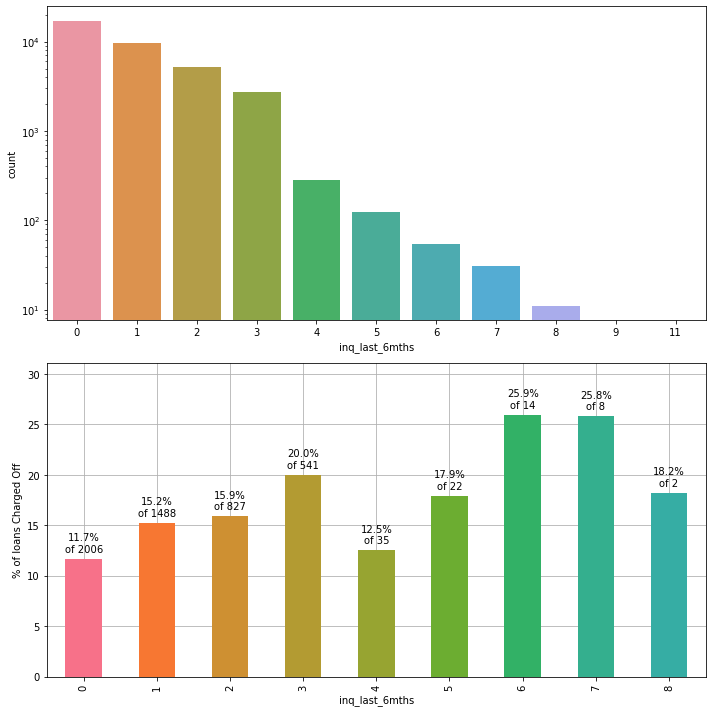

In [130]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(loan['inq_last_6mths'], order=sorted(loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plotLoanStatus(loan, 'inq_last_6mths')
plt.show()

<h2>Column:open_acc</h2>The number of open credit lines in the borrower's credit file.

In [131]:
loan.open_acc.describe()

count    35367.000000
mean         9.332004
std          4.374975
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

- The median of the distribution suggests that by large the borrower's seem to have 9 open credit lines.

<Figure size 1080x360 with 0 Axes>

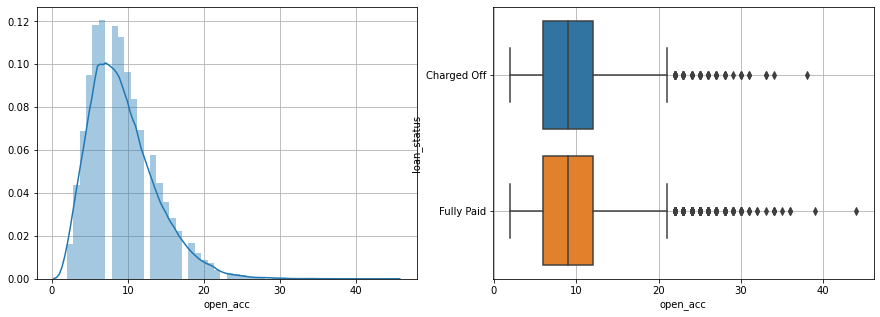

In [132]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'open_acc')
plt.show()

In [133]:
loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,9.308517,4.491786,2.0,6.0,9.0,12.0,38.0
Fully Paid,30424.0,9.335820,4.355764,2.0,6.0,9.0,12.0,44.0


**Observation:**
-  The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.
- There is no significant difference in the credit lines of charged off and fully paid loans.

<h2>Column:public_rec</h2>Number of derogatory public records.

In [134]:
loan.pub_rec.value_counts()

0    33516
1     1798
2       44
3        7
4        2
Name: pub_rec, dtype: int64

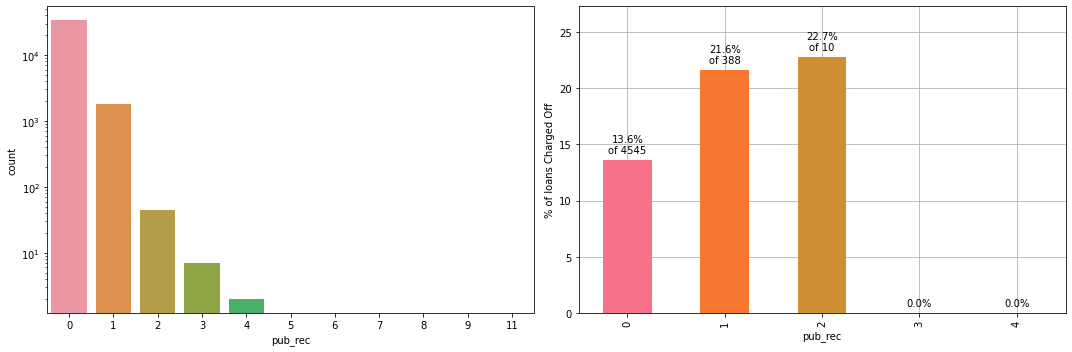

In [135]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(loan['pub_rec'], order=sorted(loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plotLoanStatus(loan, 'pub_rec')
plt.show()

**Observation:**
- 94% have no Public derogatory records. 5% have 1 derogatory record.
- Having even 1 derogatory record increases the chances of Charge Off significantly.

<h2> Column:  revol_bal</h2>Total credit revolving balance

In [136]:
loan.revol_bal.describe()

count     35367.000000
mean      13367.676733
std       15678.460397
min           0.000000
25%        3782.000000
50%        8934.000000
75%       17064.500000
max      149588.000000
Name: revol_bal, dtype: float64

In [137]:
loan.revol_bal.median()

8934.0

The revolving bal varies from min 0 to max of 150,000. The median revol_bal is of ~9000.So there are many outliers into it, Lets try to remove them

In [138]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
loan = loan[np.abs(loan.revol_bal-loan.revol_bal.mean()) <= (3*loan.revol_bal.std())]

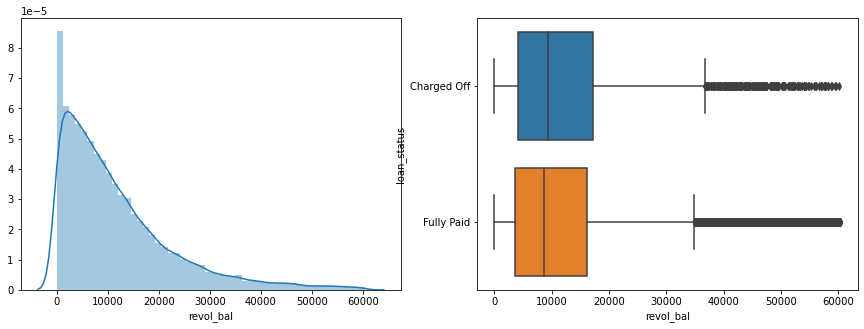

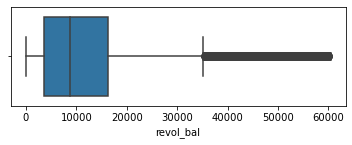

In [139]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.distplot(loan['revol_bal'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loan['revol_bal'], y=loan['loan_status'], data=loan)
plt.show()
plt.subplot(2, 1, 1)
sns.boxplot(x=loan['revol_bal'], data=loan)
plt.show()

In [140]:
loan.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4858.0,12453.837382,11330.139812,0.0,4161.0,9336.5,17212.5,60071.0
Fully Paid,29739.0,11641.208884,10974.614732,0.0,3612.0,8581.0,16138.5,60376.0


**Observation:**
-  There is no large difference in revolving balance mean for charged off an fully Paid loans

<h2>Column: revol_util</h2>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [141]:
loan.revol_util.describe()

count    34597.000000
mean        48.904609
std         28.210493
min          0.000000
25%         25.600000
50%         49.400000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

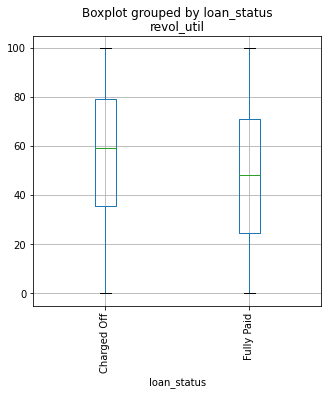

In [142]:
fig, ax = plt.subplots(figsize=(5,5))
df.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

**Observation:**
-  The average utilization rate is around 49%
-  <mark>Average revolving Utilisation rate is seen to be higher for Charged Off loans than the Fully Paid loans</mark>. This requires more analysis. 

In [143]:
loan['revol_util_bin'] = round(loan['revol_util']/5)

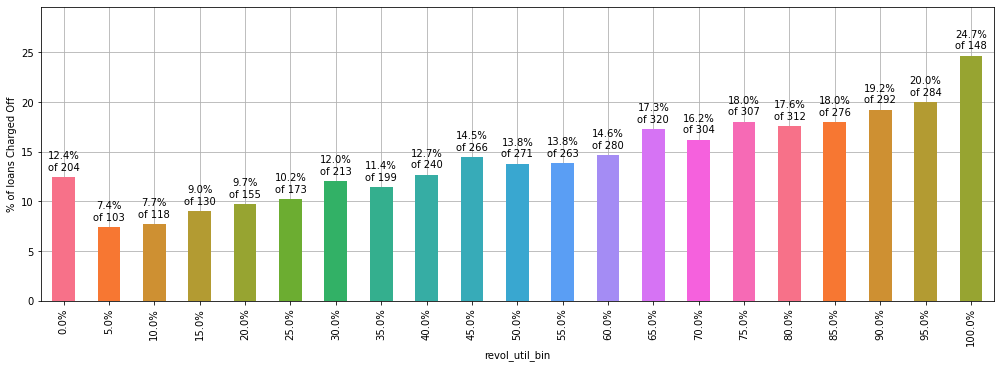

In [144]:
plt.figure(figsize=(14,5))
ax = plotLoanStatus(loan, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

<h2>Column:total_acc</h2>The total number of credit lines currently in the borrower's credit file.

In [145]:
loan.total_acc.describe()

count    34597.000000
mean        22.006272
std         11.325562
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

<Figure size 1080x360 with 0 Axes>

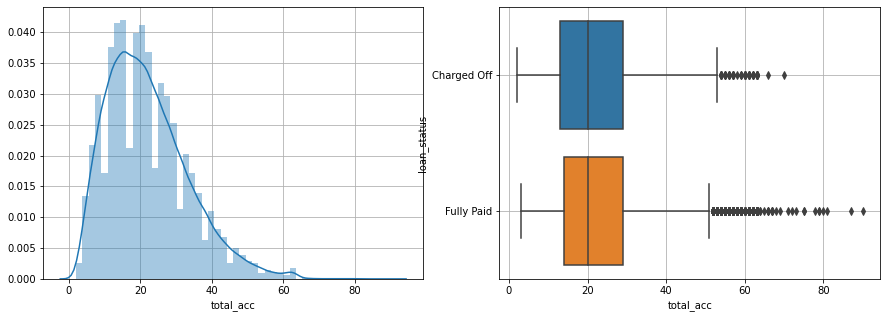

In [146]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'total_acc')

**Observation:**
-  The are approx. 22 average credit lines for the borrower's.
-  There is no big difference between the Charged Off and Fully Paid credit lines

<h2>Column:  out_prncp</h2>Remaining outstanding principal for total amount funded.

In [147]:
loan.out_prncp.value_counts()

0.0    34597
Name: out_prncp, dtype: int64

In [148]:
loan.groupby('loan_status')['out_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4858.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,29739.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**
- As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ingnored for analysis. Therefore out_prncp variable can be removed or droped.

In [149]:
loan = loan.drop('out_prncp',axis=1)

<h2>Column:  out_prncp_inv</h2>Remaining outstanding principal for portion of total amount funded by investors

In [150]:
loan.out_prncp_inv.value_counts()

0.0    34597
Name: out_prncp_inv, dtype: int64

In [151]:
loan.groupby('loan_status')['out_prncp_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4858.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,29739.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**
-  As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ignored for analysis. Therefore out_prncp_inv variable can be removed or dropped.

In [152]:
loan =loan.drop('out_prncp_inv',axis=1)

<h2>Column:  total_pymnt</h2>
Payments received to date for total amount funded.

In [153]:
loan.total_pymnt.describe()

count    34597.000000
mean     11894.392156
std       8715.509427
min         33.730000
25%       5571.230000
50%       9771.780000
75%      16113.960000
max      58563.680000
Name: total_pymnt, dtype: float64

In [154]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
loan = loan[np.abs(loan.total_pymnt-loan.total_pymnt.mean()) <= (3*loan.total_pymnt.std())]

<Figure size 1080x360 with 0 Axes>

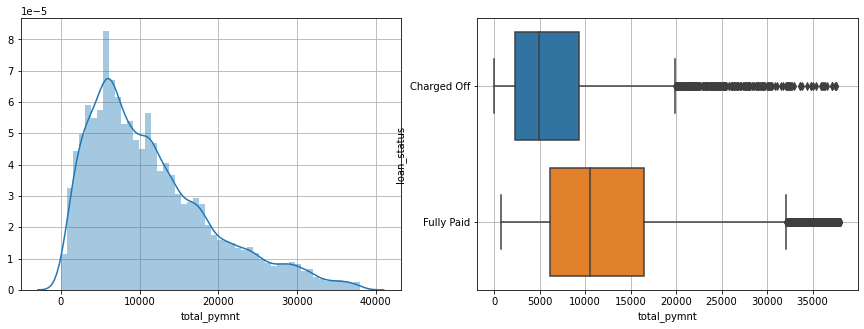

In [155]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'total_pymnt')
plt.show()

**Observation:**
-  As Expected the average payment received to date for the Charged Off loan is comparatively less than Fully Paid loans.
-  This variable may not be avaialble at the time of loan funding. We can drop this varaible from analysis.

In [156]:
loan = loan.drop('total_pymnt',axis=1)

<h2>Column:  total_pymnt_inv</h2>Payments received to date for portion of total amount funded by investors.

**Observation:** 
-  Similar to total_pymnt,this variable may not be avaialble at the time of loan funding. We can drop this variable from analysis.

In [157]:
loan = loan.drop('total_pymnt_inv',axis=1)

<h2> Column:  total_rec_prncp</h2>
Principal received to date

**Observation:**
-  This variable may not be available at the time of loan funding. we can remove this variable from analysis.

In [158]:
loan=loan.drop('total_rec_prncp',axis=1)

<h2>Column:  total_rec_int</h2>Interest received to date.

**Observation:**
-  This variable may not be avaialble at the time of loan funding. We may drop this variable from analysis.

<h2> Column:total_rec_late_fee</h2>Late fees received to date.

**Observation:**
-  The distribution of late fee is very insignificant to this analysis. we can drop this variable.
-  This variable may not be avaialble at the time of loan funding.

In [159]:
loan = loan.drop('total_rec_late_fee',axis=1)

<h2>recoveries</h2>post charge off gross recovery.
<h2>collection_recovery_fee</h2>post charge off collection fee.

**Observation:**
- <mark>Recoveries and collection_recovery_fee is only for the Charged Off loans.
- This Variable does not help as it comes to action after the loan has been Charged Off. Lets drop this variable.

In [160]:
loan =loan.drop(['recoveries','collection_recovery_fee'],axis=1)

<h2>last_pymnt_d</h2>Last month payment was received.

In [161]:
loan.last_pymnt_d.value_counts().head()

2013-03-01    940
2014-12-01    846
2013-05-01    828
2013-02-01    795
2012-03-01    781
Name: last_pymnt_d, dtype: int64

In [162]:
loan['last_pymnt_d_month']= loan['last_pymnt_d'].dt.month
loan['last_pymnt_d_year']= loan['last_pymnt_d'].dt.year

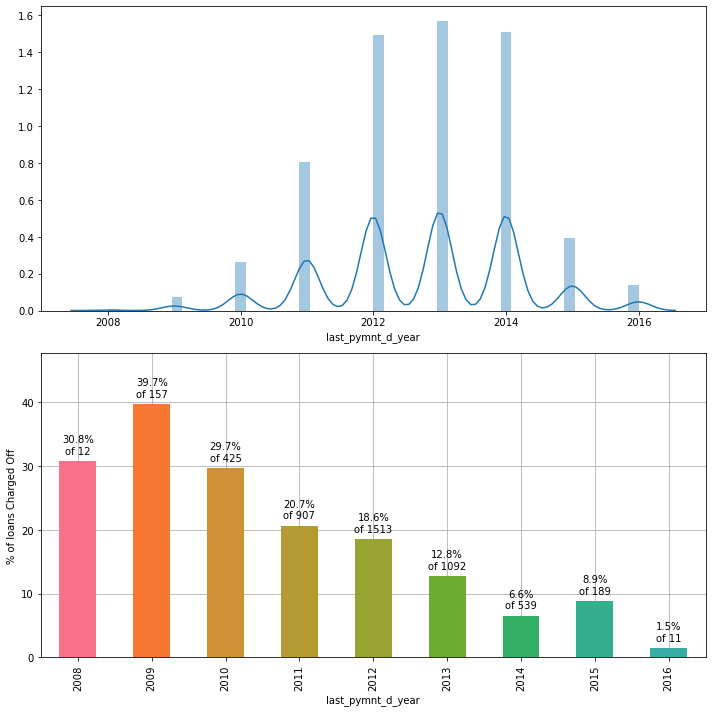

In [163]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
sns.distplot(loan['last_pymnt_d_year'])
plt.subplot(2, 1, 2)
plotLoanStatus(loan, 'last_pymnt_d_year')
plt.show()


**Observation:**
-  Overall, around 75% of the last payment dates are during 2012-2014 period.
-  40% of loans with a last payment date of 2009 are Charged Off. This is due to the 2008 subprime crisis. 
- This variable does not affect analysis and will be ignored. 

<h2> Column:  last_credit_pull_d</h2>The most recent month LC pulled credit for this loan

In [164]:
loan.last_credit_pull_d.value_counts().head()

2016-05-01    8347
2016-04-01    2106
2016-03-01    1009
2013-02-01     753
2016-02-01     654
Name: last_credit_pull_d, dtype: int64

In [165]:
loan['last_credit_pull_d_month']= loan['last_credit_pull_d'].dt.month
loan['last_credit_pull_d_year']= loan['last_credit_pull_d'].dt.year

In [166]:
loan.last_credit_pull_d_year.value_counts()

2016    12698
2014     5527
2015     4941
2013     4632
2012     3638
2011     1862
2010      615
2009      143
2008       18
Name: last_credit_pull_d_year, dtype: int64

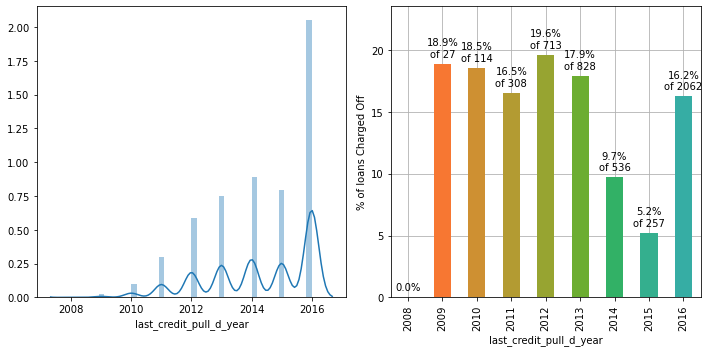

In [167]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(loan['last_credit_pull_d_year'])
plt.subplot(1,2,2)
plotLoanStatus(loan, 'last_credit_pull_d_year')
plt.show()

**Observation:**
-  Lending Club is pulling more credit reports in recent years, suggesting that the company is taking bad loans more seriously 
- This variable can be ignored in our analysis. 

<h2>Column: last_pymnt_amnt</h2>Last total payment amount received

In [168]:
loan['last_pymnt_amnt_log'] = loan['last_pymnt_amnt'].apply(lambda x : np.log(x))

<Figure size 1080x360 with 0 Axes>

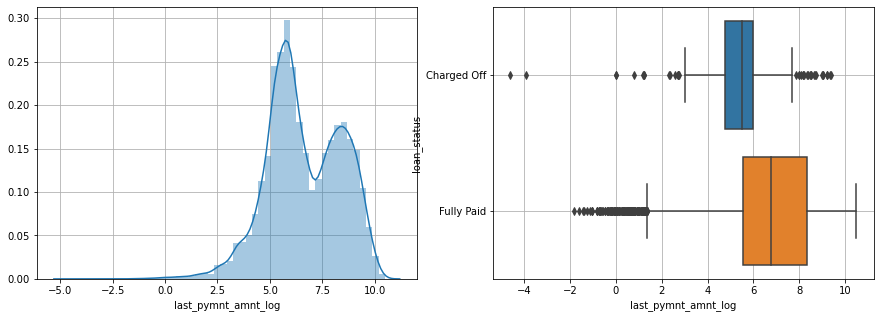

In [169]:
plt.figure(figsize=(15,5))
plot_distribution(loan, 'last_pymnt_amnt_log')
plt.show()

**Observation:**
- As we know already that,last Payment amount received is significantly lower for Charged Off loans as compared to the Fully Paid loans. This is expected in case of charged of loans 

<h2>Derived variable - ratio of loan amount to annual income</h2>

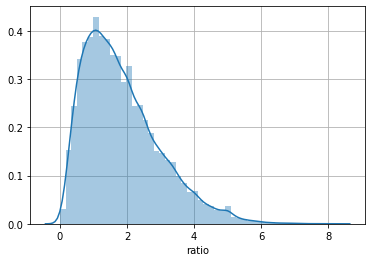

In [170]:
loan['ratio'] = loan['loan_amnt'] * 10 / loan['annual_inc']
ax = sns.distplot(loan['ratio'])
ax.grid(zorder=0)
ax.set_axisbelow(True)

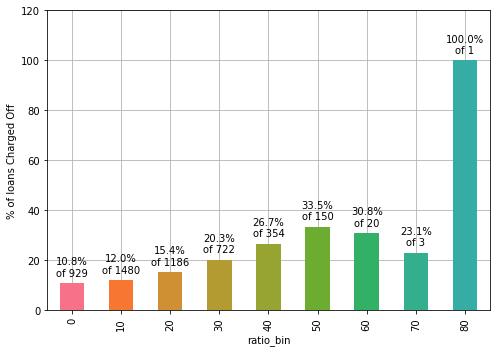

In [171]:
loan['ratio_bin'] = (loan['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plotLoanStatus(loan, 'ratio_bin')

**Observation**
* As long as loan amount is less than 20% of annual income, defaults are low.
* Loan amounts of 30% of annual income or higher see a high rate of default.

<h2>Lets see Bivariate Analysis</h2>

**loan_amnt** over time

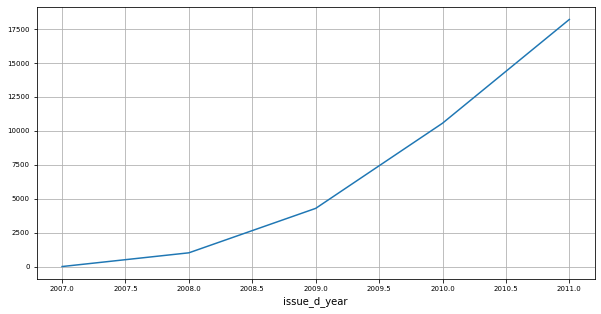

In [172]:
plt.figure(figsize=(10,5))
ax = loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.show()

**Avg. loan amount over time**

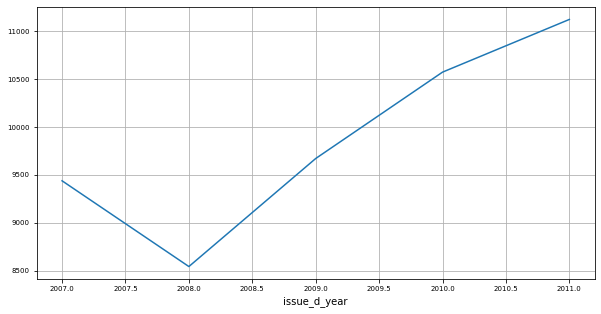

In [173]:
plt.figure(figsize=(10,5))
ax = loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.show()

**loan_amnt and annual inc**

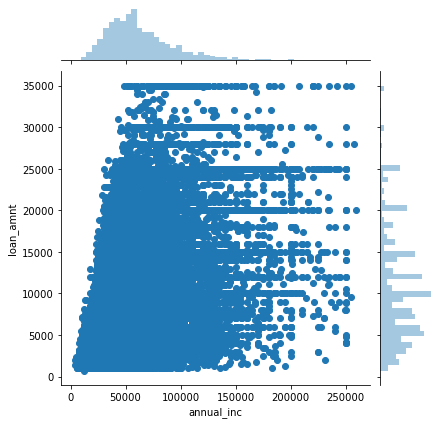

In [174]:
ax = sns.jointplot('annual_inc', 'loan_amnt', loan.loc[loan['annual_inc']<260000])
plt.show()

**Observation**
* There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans.

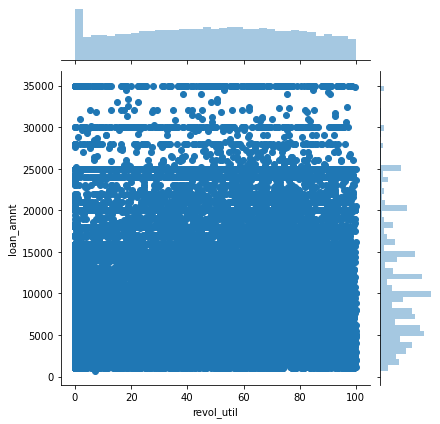

In [175]:
ax = sns.jointplot('revol_util','loan_amnt',loan)
plt.show()

**loan_amnt vs grade**

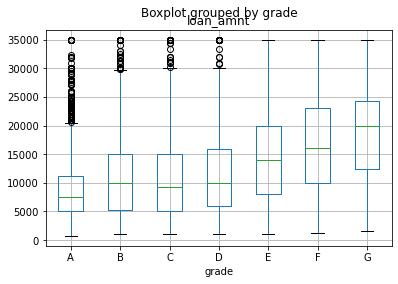

In [176]:
loan.boxplot(column='loan_amnt', by='grade')
plt.show()

**loan_amnt vs verification_status vs loan status**

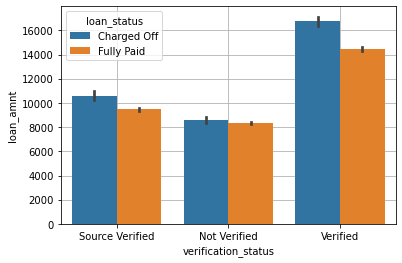

In [177]:
ax = sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
ax.grid(zorder=0)
ax.set_axisbelow(True)

**Observation**
* Higher loan amounts are Verified more often.
* We already know that larger loans are less in number, but see a higher charge off rate.
* This, combined with previous observation, explains why verfied loans see a higher rate of default. It's not the verified status , it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club.

**Interest Rate and Term**

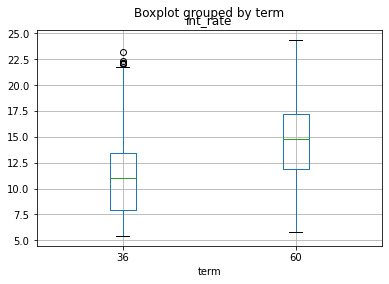

In [178]:
loan.boxplot(column='int_rate', by='term')
plt.show()

**Observation:**
-  Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

**Interest Rate and Sub Grade**

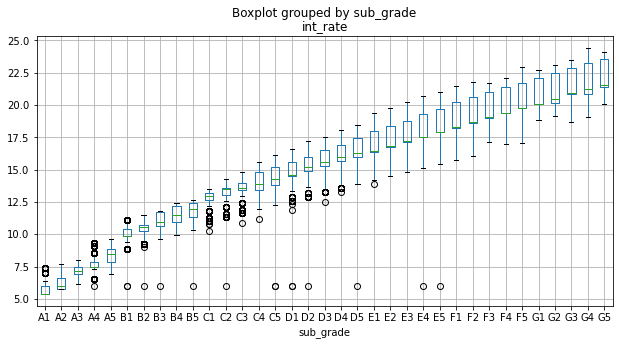

In [179]:
loan.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

**Observation:**
-  Interest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.

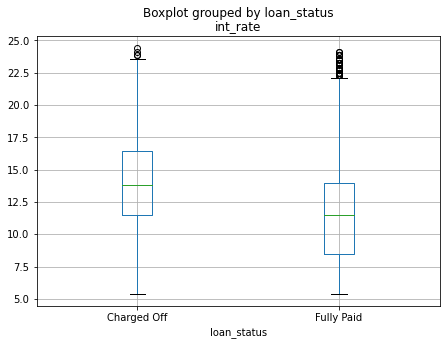

In [180]:
loan.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

**Observation:**
- Loans at a higher intrest rate are more likely to be Charged Off.

<b>Loan amount Vs Grade Vs Term</b>

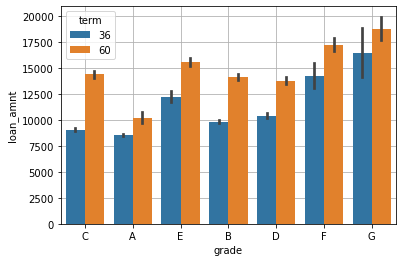

In [181]:
ax = sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan, estimator=np.mean)
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.

<b>revol_util Vs grade Vs Loan Status</b>

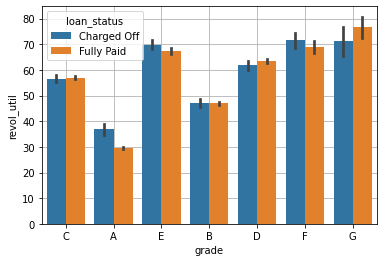

In [182]:
ax = sns.barplot(x='grade', y='revol_util', hue="loan_status", data=loan, estimator=np.mean)
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.show()

**Observation:**
-  revol_util and grade(and therefore int_rate) are correlated in some way. The revol_util is positively correlated to the grade. As the grade goes from A to E the revol_util also increases. This may be because higer loan amounts are associated with higher grades.

<b>Loan amount Vs addr_state vs loan Status</b>

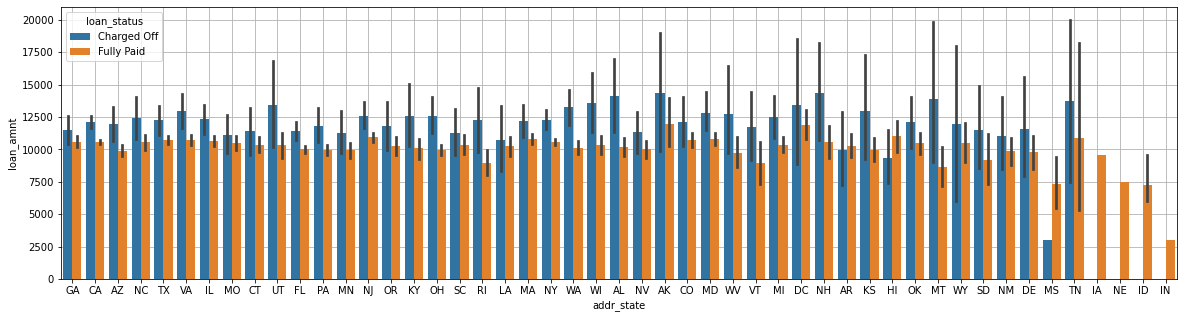

In [183]:
plt.figure(figsize=(20,5))
ax= sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan, estimator=np.mean)
ax.grid(zorder=0)
ax.set_axisbelow(True)

plt.show()

**Observation:**
-  States WY: Wyoming has the the highest average loan amount that was charged off. whats happening in this state is something LC can investigate into for this state.

In [184]:
corr=loan.corr()
corr['loan_amnt']

loan_amnt                   1.000000
int_rate                    0.267460
installment                 0.924973
emp_length                  0.139453
annual_inc                  0.227570
dti                         0.063434
delinq_2yrs                -0.040534
inq_last_6mths              0.010051
open_acc                    0.166074
pub_rec                    -0.040321
revol_bal                   0.349543
revol_util                  0.061901
total_acc                   0.244417
total_rec_int               0.704315
last_pymnt_amnt             0.441570
pub_rec_bankruptcies       -0.023352
earliest_cr_line_month     -0.013172
earliest_cr_line_year      -0.180141
issue_d_month               0.049346
issue_d_year                0.088558
interest_rate_buckets       0.267695
income_bin                  0.228479
revol_util_bin              0.061512
last_pymnt_d_month          0.000539
last_pymnt_d_year           0.064966
last_credit_pull_d_month   -0.011223
last_credit_pull_d_year     0.041673
l

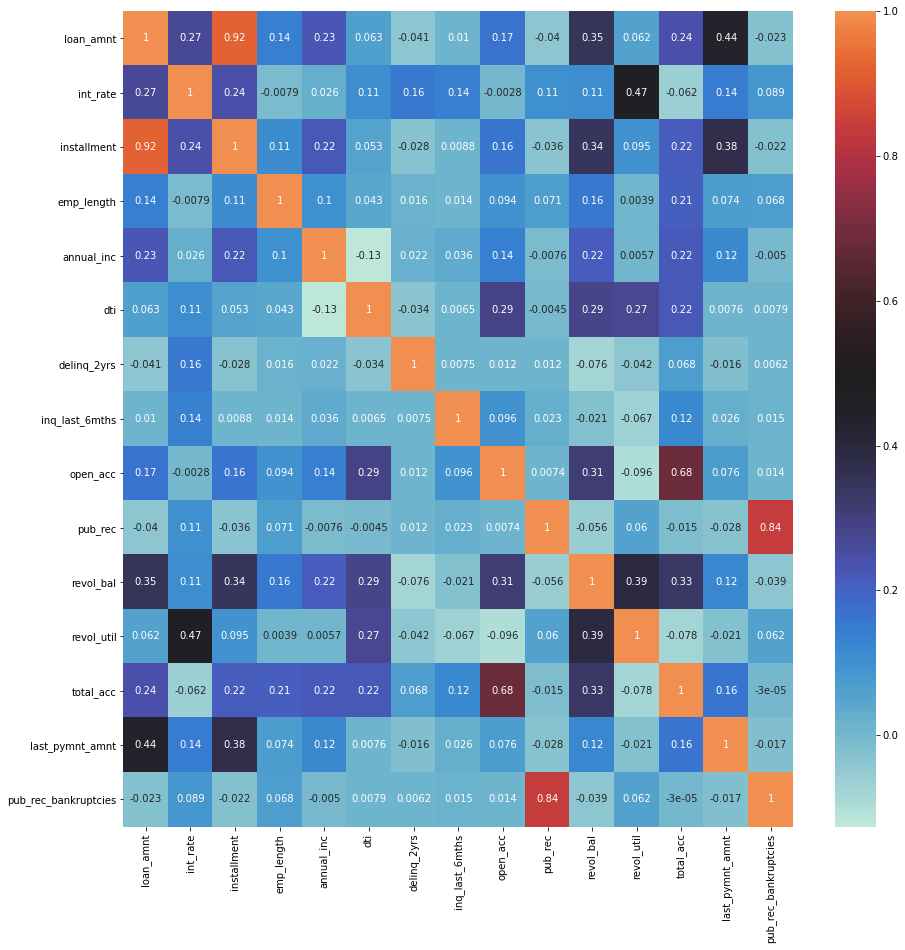

In [185]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment','verification_status',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

**Observation:**
- loan_amnt is correlated to last_payment_amount with r factor.44, as expected
- int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.
- loan_amnt revol_bal are correlated with r factor .35 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.
- delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value. 

<b>dti Vs open_acc</b>

In [186]:
loan['dti_bin']
loan.groupby('dti_bin').int_rate.mean()

dti_bin
0-5      11.052034
5-10     11.529209
10-15    11.972936
15-20    12.308956
20-25    12.565350
25-30     9.505806
Name: int_rate, dtype: float64

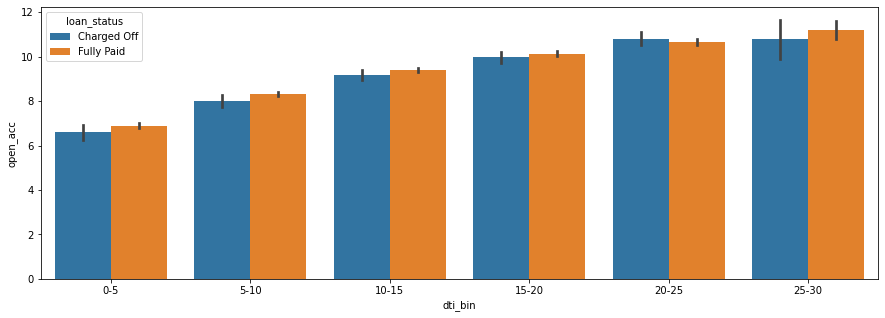

In [187]:
plt.figure(figsize=(15,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=loan, estimator=np.mean)
ax.grid(zorder=0)
ax.set_axisbelow(True)
plt.show()

**Observation:**
-  The dti increses with the number of open credit line in borrowers credit file.

###  delinq_2yr VS loan amount VS grade

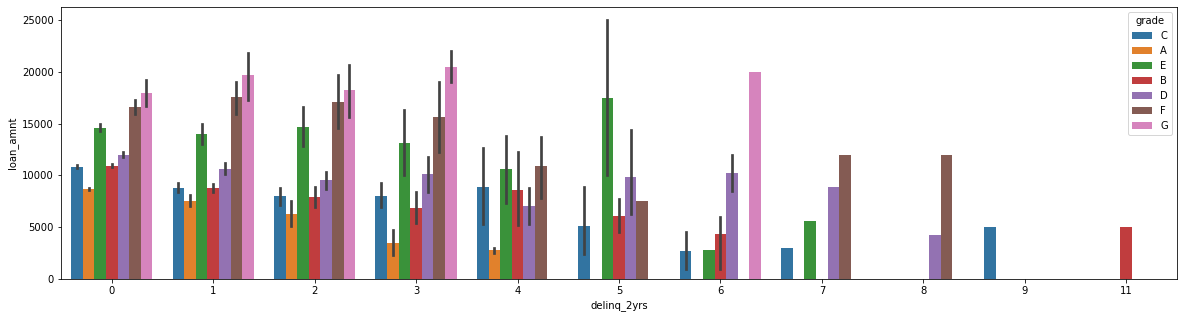

In [188]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=loan, estimator=np.mean)
plt.show()

**Observation**
 Not many loans receive investment with higher number of delinquencies(>4). Despite the low loan amount request, these loans are considered risky and are not invested much in.
- Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies. 

###  delinq_2yr VS int_rate  VS loan_status

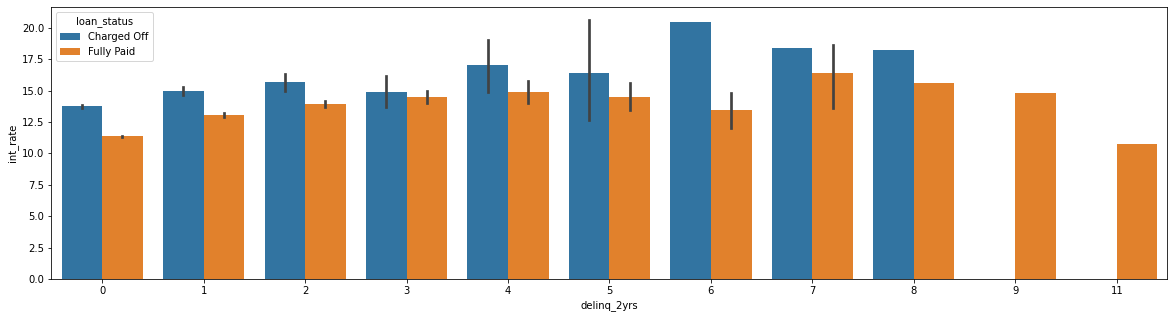

In [189]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=loan, estimator=np.mean)
plt.show()

**Observation:**
- In general, interest rate offered increases with the number of deliquency of the borrower but that shouldnot be the case.The company should restrict this

**Recommendations For Lending Club**<br>
- <mark> Stop – approving loans where amount/income is higher than 30%

- <mark> Reduce – number of approvals where purpose is small business

- <mark> Stop – approving high-value loans when revolving line utilization rate greater than 75%

- <mark> Stop – approving loans to people with prior bad record. Or at least stop approving high-value loans.

- <mark> Start – charging higher interest rates for loans with dti greater than 20